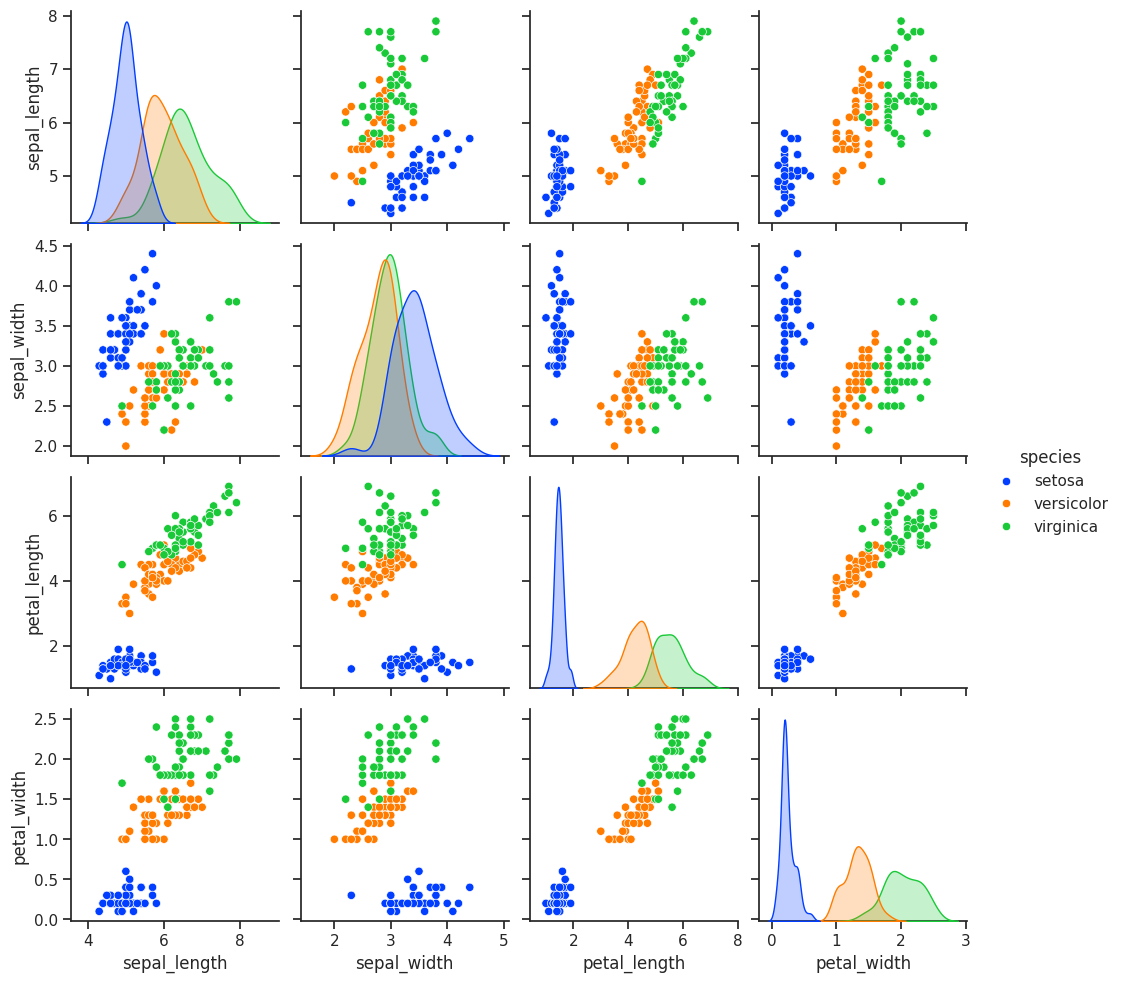

In [1]:

# Importujemy wymagane biblioteki
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Wczytanie zbioru danych Iris
iris = load_iris()

# Konwersja danych do formatu pandas DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
iris_df['species'] = pd.Categorical.from_codes(iris.target, categories=iris.target_names)

# Tworzenie pairplot za pomocą Seaborn
sns.set(style="ticks")
pairplot = sns.pairplot(iris_df, hue='species', diag_kind='kde', palette='bright')

# Wyświetlenie wykresu
plt.show()


In [2]:
import numpy as np
from collections import Counter

def knn_predict(X_train, y_train, X_test, k, d):
    """
    Prosta implementacja metody kNN.

    Parametry:
    - X_train: numpy array, dane treningowe (cechy)
    - y_train: numpy array, etykiety danych treningowych
    - X_test: numpy array, dane testowe (cechy)
    - k: int, liczba sąsiadów
    - d: funkcja, metryka do obliczania odległości między punktami

    Zwraca:
    - y_pred: lista przewidywanych etykiet dla X_test
    """
    y_pred = []
    for x in X_test:
        # Oblicz odległości do wszystkich punktów treningowych
        distances = [d(x, x_train) for x_train in X_train]

        # Znajdź k najbliższych sąsiadów (indeksy posortowane rosnąco po odległości)
        nearest_indices = np.argsort(distances)[:k]

        # Głosowanie większościowe na podstawie etykiet sąsiadów
        nearest_labels = [y_train[i] for i in nearest_indices]
        most_common = Counter(nearest_labels).most_common(1)[0][0]

        # Dodaj przewidywaną etykietę
        y_pred.append(most_common)
    return y_pred

# Przykład użycia:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Wczytanie zbioru danych Iris
iris = load_iris()
X = iris.data
y = iris.target

# Podział danych na zestawy treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Definicja metryki (np. odległość euklidesowa)
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

# Klasyfikacja kNN
k = 3
y_pred = knn_predict(X_train, y_train, X_test, k, euclidean_distance)

# Ocena modelu
accuracy = np.mean(y_pred == y_test)
print("Dokładność:", accuracy)


Dokładność: 0.9555555555555556


In [3]:
# Importowanie bibliotek
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Dane wejściowe (cechy) i wyjściowe (etykiety gatunków)
X = iris.data  # Cechy
y = iris.target  # Etykiety

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Tworzenie i trenowanie modelu kNN
k = 3  # Liczba sąsiadów
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Przewidywanie na zbiorze testowym
y_pred = knn.predict(X_test)

# Ocena modelu
print("Raport klasyfikacji:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

print("Dokładność modelu:", accuracy_score(y_test, y_pred))


Raport klasyfikacji:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

Dokładność modelu: 0.9555555555555556
